# Orders Challengue
## sep2023_PE_CO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("orders_challengue_sep2023_PE_CO.csv", sep=",", engine="python")
df.head(10)

,ORDER_ID,CREATED_AT,TO_USER_DISTANCE,TOTAL_EARNINGS,DISTANCE_TO_STORE,TIP,COUNTRY,CITY,SATURATION,TAKEN
0,2160622823,2023-09-02T19:24:16.793784Z,6.3,8032.39,1.048795,0.0,CO,"""medellin""",0,1
1,2160418716,2023-09-02T00:28:09.358242Z,5.5,14350.00,0.517170,5400.0,CO,"""bogota""",0,0
2,2160741817,2023-09-02T23:21:02.006797Z,1.9,2800.00,0.196478,0.0,CO,"""pereira""",0,1
3,2160708953,2023-09-02T21:28:16.32926Z,5.1,6923.79,0.924649,0.0,CO,"""medellin""",0,0
4,2160556289,2023-09-02T14:52:50.648279Z,3.7,4278.56,0.263326,5000.0,CO,"""bogota""",0,1
5,2160425684,2023-09-02T02:36:03.177486Z,6.4,14500.00,1.158371,2000.0,CO,"""medellin""",0,1
6,2160612707,2023-09-02T17:50:13.603998Z,2.1,3900.00,0.373521,0.0,CO,"""barranquilla""",0,1
7,2160514927,2023-09-02T13:08:40.955148Z,8.7,10166.01,0.377709,0.0,CO,"""bogota""",0,0
8,2160515425,2023-09-02T13:24:12.694805Z,1.0,4800.00,0.440967,2000.0,CO,"""medellin""",0,1
9,2160508423,2023-09-02T13:06:11.528423Z,6.5,8851.84,1.606708,0.0,CO,"""medellin""",0,1


## 1. Data exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4488653 entries, 0 to 4488652
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ORDER_ID           int64  
 1   CREATED_AT         object 
 2   TO_USER_DISTANCE   float64
 3   TOTAL_EARNINGS     float64
 4   DISTANCE_TO_STORE  float64
 5   TIP                float64
 6   COUNTRY            object 
 7   CITY               object 
 8   SATURATION         int64  
 9   TAKEN              int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 342.5+ MB


In [3]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count)


ORDER_ID             0
CREATED_AT           0
TO_USER_DISTANCE     0
TOTAL_EARNINGS       0
DISTANCE_TO_STORE    0
TIP                  0
COUNTRY              0
CITY                 0
SATURATION           0
TAKEN                0
dtype: int64


### 1.1. Numeric variables

In [4]:
df.describe()

,ORDER_ID,TO_USER_DISTANCE,TOTAL_EARNINGS,DISTANCE_TO_STORE,TIP,SATURATION,TAKEN
count,4.488653e+06,4.488653e+06,4.488653e+06,4.488653e+06,4.488653e+06,4488653.0,4.488653e+06
mean,2.164475e+09,3.855165e+00,6.108295e+03,6.478692e-01,1.036605e+03,0.0,7.244603e-01
std,2.325085e+06,2.329184e+00,4.783389e+03,5.295257e-01,1.641831e+03,0.0,4.467859e-01
min,2.160110e+09,1.000000e-01,2.500000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,2.162480e+09,2.000000e+00,2.800000e+03,1.956607e-01,0.000000e+00,0.0,0.000000e+00
50%,2.164862e+09,3.400000e+00,5.800000e+03,5.240406e-01,0.000000e+00,0.0,1.000000e+00
75%,2.166392e+09,5.300000e+00,8.800000e+03,9.971446e-01,1.900000e+03,0.0,1.000000e+00
max,2.168433e+09,3.301000e+02,7.440000e+04,5.356428e+00,5.951000e+04,0.0,1.000000e+00


array([[<Axes: title={'center': 'TO_USER_DISTANCE'}>,
        <Axes: title={'center': 'TOTAL_EARNINGS'}>,
        <Axes: title={'center': 'DISTANCE_TO_STORE'}>],
       [<Axes: title={'center': 'TIP'}>,
        <Axes: title={'center': 'SATURATION'}>,
        <Axes: title={'center': 'TAKEN'}>]], dtype=object)

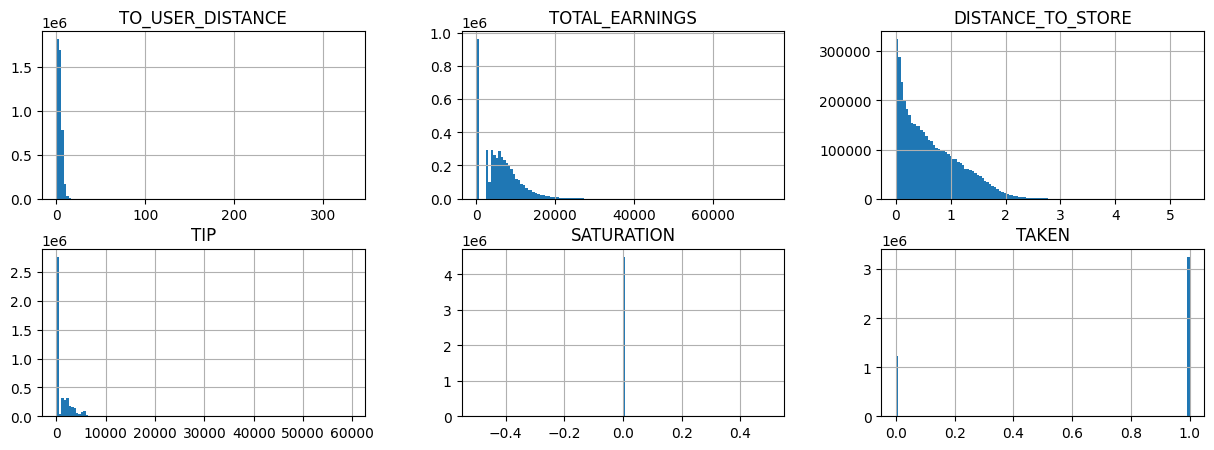

In [5]:
columns = [
    "TO_USER_DISTANCE",
    "TOTAL_EARNINGS",
    "DISTANCE_TO_STORE",
    "TIP",
    "SATURATION",
    "TAKEN",
]
df.hist(column=columns, bins=120, layout=(2, 3), figsize=(15, 5))

<Axes: >

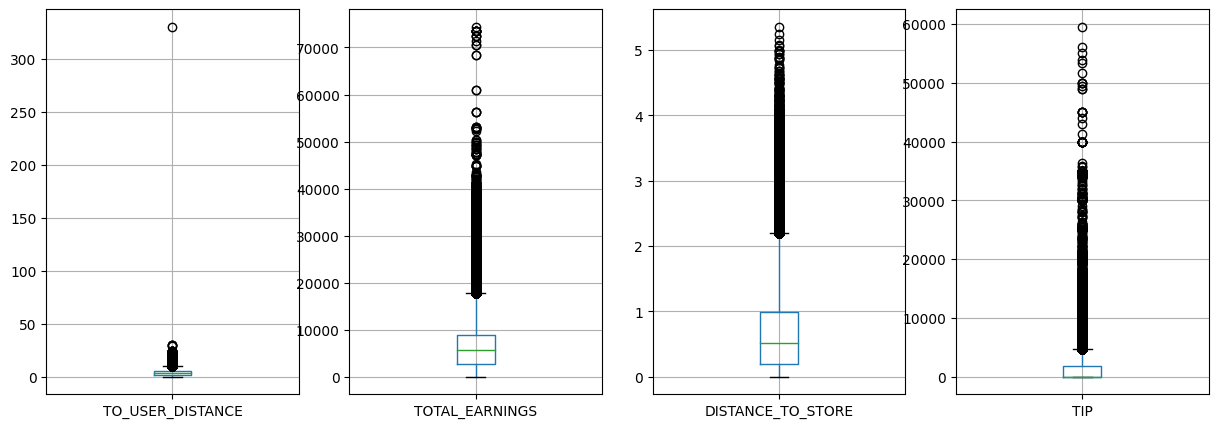

In [6]:
# define subplot layout
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

# add DataFrames to subplots
df[["TO_USER_DISTANCE"]].boxplot(ax=axes[0])
df[["TOTAL_EARNINGS"]].boxplot(ax=axes[1])
df[["DISTANCE_TO_STORE"]].boxplot(ax=axes[2])
df[["TIP"]].boxplot(ax=axes[3])

### 1.2. Categorical variables

In [7]:
df.describe(include=[object])

,CREATED_AT,COUNTRY,CITY
count,4488653,4488653,4488653
unique,847284,2,44
top,2023-09-10T13:10:19.165698Z,CO,"""bogota"""
freq,47,3528331,1560764


In [8]:
print("Countries:", df["COUNTRY"].unique())
print("Cities:", df["CITY"].unique())

Countries: ['CO' 'PE']
Cities: ['"medellin"' '"bogota"' '"pereira"' '"barranquilla"' '"santamarta"'
 '"cartagena"' '"armenia"' '"manizales"' '"valledupar"' '"cali"' '"tunja"'
 '"monteria"' '"villavicencio"' '"ibague"' '"bucaramanga"' '"duitama"'
 '"cucuta"' '"fusagasuga"' '"yopal"' '"florencia"' '"sincelejo"' '"tulua"'
 '"lima"' '"piura"' '"trujillo"' '"arequipa"' '"popayan"' '"neiva"'
 '"sogamoso"' '"pasto"' '"girardot"' '"riohacha"' '"cusco"' '"chiclayo"'
 '"ica"' '"huancayo"' '"puntahermosa"' '"barrancabermeja"' '"buga"'
 '"pitalito"' '"cajamarca"' '"facatativa"' '"chimbote"' '"sangil"']


<Axes: xlabel='CITY', ylabel='Count'>

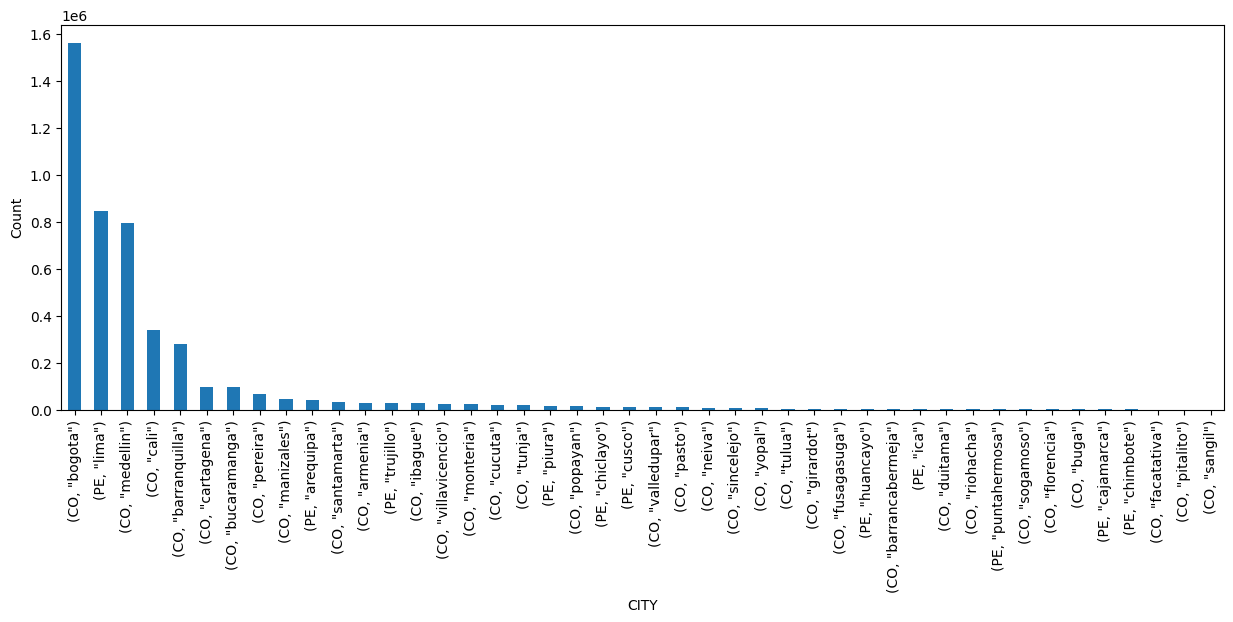

In [9]:
columns = ["COUNTRY", "CITY"]
df[["COUNTRY", "CITY"]].value_counts().plot(
    kind="bar", xlabel="CITY", ylabel="Count", rot=90, figsize=(15, 5)
)


<Axes: xlabel='COUNTRY', ylabel='Count'>

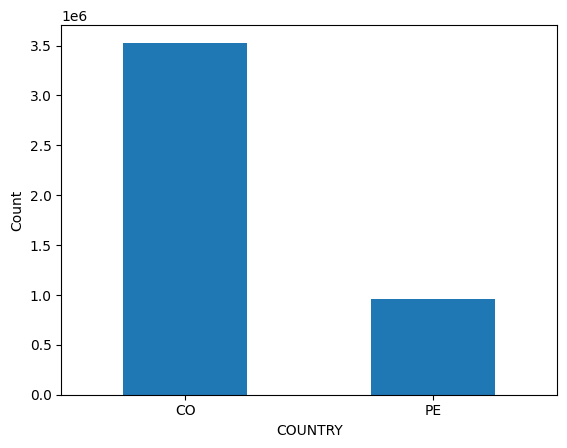

In [10]:
df["COUNTRY"].value_counts().plot(kind="bar", xlabel="COUNTRY", ylabel="Count", rot=0)

### 1.3. Target

<Axes: xlabel='TAKEN', ylabel='Count'>

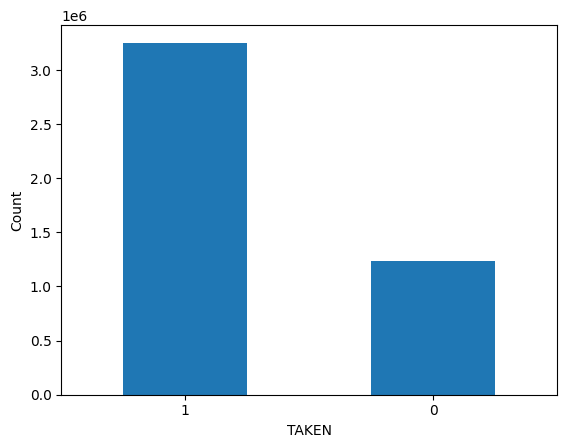

In [11]:
df["TAKEN"].value_counts().plot(kind="bar", xlabel="TAKEN", ylabel="Count", rot=0)

## 2.  Machine Learning model. Classification for TAKEN variable.

### Training and evaluation

In [1]:
# Import mlflow
from ClassifierModel import DTCTrainer, DTCModel

# Instanciamos la clase de entrenamiento
trainer = DTCTrainer(test_size=0.3)

# Get data
dataset_path = "orders_challengue_sep2023_PE_CO.csv"
X_train, X_test, y_train, y_test = trainer.get_data(dataset_path)
    
# Transform data
X_train = trainer.fit_transform(X_train)
X_test = trainer.transform(X_test)

# Parameters for DecisionTreeClassifier
criterion='gini'
max_depth=None
class_weight="balanced"
random_state=0

# Training model
trainer = trainer.train(X_train, X_test, y_train, y_test, criterion=criterion, max_depth=max_depth, class_weight=class_weight, random_state=random_state)

# Save model and preprocessor
trainer.save_model_scaler_enc(filepath_model="model.pkl", filepath_preprocessor= "preprocessor.pkl")


Leyendo datos y creando nuevas features...
Dividiendo en conjunto de train y test (test_size=0.3)...
Datos cargados!
Ajustando preprocessor...
Peprocessor ajustando!
Transformando datos...
Datos transformados!
Transformando datos...
Datos transformados!
Acurracy Score: 0.6589184878018352
Precision Score: 0.7631859067560375
Recall Score: 0.7672750383115252
f1 Score: 0.765225009801481


c:\Users\cami10\miniconda3\lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


****************************************************************************************************
Modelo guardado en: model.pkl
Preprocessor guardado en: preprocessor.pkl
****************************************************************************************************


### Peedictions

In [2]:
filepath_model = "model.pkl"
filepath_preprocessor = "preprocessor.pkl"

# Instanciamos la clase del modelo DecisionTreeClassifier
model = DTCModel(filepath_model, filepath_preprocessor)

# Get data
data_path = "test_set.csv"
X = model.get_data(data_path)

# Preprocess data
X = model.transform(X)

# Predictions
y_pred = model.predict(X)

print("Predictions:\n", y_pred[])

Transformando datos...
Datos transformados!
Predictions:
 [1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1